## PART B.  Develop a Baseline Neural Network Model
### Normalized Data
#### Predicting Concrete Strength
Hidden layer of 10 nodes, activation f: RelU, optimizer: adam and loss: MSE
Train 50 epochs, 100 Iterations for MSE

##### Import functions required and the Keras objects library

In [7]:
import pandas as pd
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

print ("Ready, Set, Go!!!!!!!")

Ready, Set, Go!!!!!!!


 ### Build the neural network

##### Import Data - preprocess

In [8]:
concrete_data = pd.read_csv('https://cocl.us/concrete_data')
concrete_data.tail(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.4


In [9]:
concrete_data.isnull().sum(); #Check for null values

##### Define predictors and target

In [10]:
concrete_data_columns = concrete_data.columns
#SET TARGET VARIABLE - STRENGTH
target = concrete_data['Strength']
#SET PREDICTORS TO BE ALL OTHER COLUMNS
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']]

##### Check data size

In [11]:
#TARGET - STRENGTH COLUMN
shape = concrete_data.shape
print('\nNumber of samples/rows :', shape[0])
target.tail(1)


Number of samples/rows : 1030


1029    32.4
Name: Strength, dtype: float64

#### Normalize data by substracting the mean and dividing by the standard deviation.

#### Define Target and Predictors

In [12]:
#SET NORMALIZED TARGET and PREDICTORS
target_norm = (target - target.mean()) / target.std()
predictors_norm = (predictors - predictors.mean()) / predictors.std()
#predictors_norm.head() #check
target_norm.tail(2) #check

1028   -0.182450
1029   -0.204598
Name: Strength, dtype: float64

In [13]:
cols = predictors_norm.shape[1]
predictors_norm.tail(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
1029,-0.193939,0.308349,0.376762,0.891286,0.400971,-1.394385,-0.150675,-0.279597


#### Develop Baseline Regression Model

In [14]:
#SET  VARIABLES FOR THE BASELINE MODEL
nodes = 10
output = 1

# define base regression model
def regression_model(nodes):
    # create model
    model = Sequential()
    model.add(Dense(nodes, activation='relu', input_shape=(cols,))) #1 hidden layer , 10 nodes, relu activation
    model.add(Dense(output)) #Output Layer
        # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

### Split Train/Test Data - Step 1

In [15]:
#SET SEED A FIXED VALUE FOR REPRODUCITY
import numpy
seed = 7
numpy.random.seed(seed)

# Split Train/Test Data
X = predictors_norm
y = target_norm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
train_test_split(y, shuffle=True)

[344   -1.092317
 316   -0.112414
 556   -0.190830
 680   -1.109676
 507    1.570241
          ...   
 919   -0.641573
 211   -0.678686
 502   -0.139351
 537    0.486182
 175    2.602820
 Name: Strength, Length: 772, dtype: float64,
 204   -1.397601
 294   -1.701089
 709   -0.222556
 716   -1.540067
 60     1.111117
          ...   
 242   -0.267451
 715    0.229983
 435    0.322167
 758   -0.795413
 713   -1.564011
 Name: Strength, Length: 258, dtype: float64]

## Train and Evaluate Model - Steps 2,3 and
## Iterations - Step 4

#### Define and compile baseline regression model

In [16]:
nodes = 10
output = 1

# define base regression model
def regression_model(nodes):
    # create model
    model = Sequential()
    model.add(Dense(nodes, activation='relu', input_shape=(cols,))) #1 hidden layer , 10 nodes, relu activation
    model.add(Dense(output)) #Output Layer
        # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#### Initialize the Model, Split Train/Test Data, Train Model, Evaluate and List MSE

In [17]:
#USED TO MONITOR OUTPUT IN A SINGLE LINE
from IPython.display import display, clear_output

#SET VARIABLES FOR THE ASSIGNMENTS THAT WILL CHANGE IN ASSIGNMENTS
epochs = 50
b = 32
Blist = []

#SET SEED A FIXED VALUE FOR REPRODUCITY
import numpy
seed = 7
numpy.random.seed(seed)

#SET THE PROGRESS COUNTDOWN n
n = 0
iterations = 50
i = 0

# HERE WE GO!
for i in range(iterations):
    
    #To monitor will set up a countER
    clear_output(wait=True)            # Print and "overwrite" all print statements sequentially
    n = i + 1                          # Counter less the index for report
    print("Iteration {} ".format(n) + "..... Training is in progress.")
        
#Initialize the model
    model = regression_model(nodes)

# Split Train/Test Data
    X = predictors_norm
    y = target_norm
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)
    train_test_split(y, shuffle=True)

# Train / fit the model
    model.fit(X, y, validation_split=0.3, epochs=epochs, batch_size=b, verbose=0, shuffle=True)
    prediction = model.predict(X)
    prediction
        
# Calculate MSE of EACH iteration
    mse = mean_squared_error(target_norm,prediction)

# Create a list of MSE's, add each one to a list
    Blist.append(mse)
    
result = np.array(Blist)
print ("Training is complete for {} iterations! ".format(n))
result  

Iteration 50 ..... Training is in progress.
Training is complete for 50 iterations! 


array([0.2378503 , 0.20772495, 0.27899807, 0.25627872, 0.27973894,
       0.35519655, 0.20159624, 0.28625911, 0.30723199, 0.20707851,
       0.21139139, 0.31579932, 0.3086246 , 0.24931418, 0.27065225,
       0.24716625, 0.36195818, 0.29133184, 0.23330191, 0.27829329,
       0.28550748, 0.27817875, 0.29573895, 0.27681351, 0.2529624 ,
       0.33050852, 0.25101424, 0.20836058, 0.22245859, 0.33504576,
       0.31057651, 0.27449187, 0.31839623, 0.19316772, 0.27933257,
       0.24499247, 0.34784957, 0.34332368, 0.31622608, 0.27582591,
       0.23382943, 0.31844625, 0.30622892, 0.24746139, 0.32398255,
       0.2654341 , 0.25338923, 0.24921502, 0.28909442, 0.24504314])

### B5. Final Report
Calculate and print mean and standard deviation of the mean squared errors of each iteration.

In [41]:
mse_mean = (numpy.mean(result))
mse_stddev = (numpy.std(Blist))

print("FINAL REPORT:")
print("MSE Mean: %.3f" % (mse_mean))
print("MSE Standard Deviation: %.3f" % (mse_stddev))

FINAL REPORT:
MSE Mean: 0.275
MSE Standard Deviation: 0.042


### Part B Observations
Mean squared errors are much lower in this trial. Normalization is shown to be more accurate  
than raw data.

#### *Optional - Data Visualization*

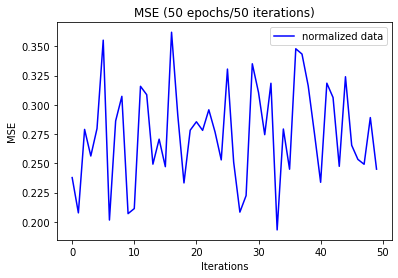

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('fig-msePartB.pdf')

fig1 = plt.figure()
plt.plot(Blist, label= 'normalized data', color='blue')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.title('MSE (50 epochs/50 iterations)')
plt.legend(loc = 'best')
plt.show()
pdf.savefig(fig1)
plt.savefig('fig-msePARTB.png')

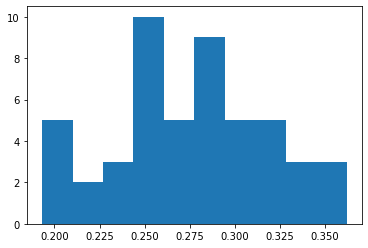

<Figure size 432x288 with 0 Axes>

In [23]:
pyplot.hist(result)
pyplot.show()
plt.savefig('fig-msePartBhist.png')